In [79]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation
import numpy as np
matplotlib.rcParams['animation.embed_limit'] = 2**128
from numpy import linalg as LA
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [105]:
L1 = 5
L2 = 10
k = 4
h = 0.05
U = 2
l1 = int((L1+2)/h)
l2 = int((L2+2)/h)
d20 = -10/3 + k*k*h*h*(46/45 - k*k*h*h/12 + k**4*h**4/360)
d21 = 2/3 - k*k*h*h/90
d22 = 1/6 + k*k*h*h/180
b20 = h*h * (1 - k*k*h*h/12 + k**4*h**4/360)
b21 = h**4/12 * (1 - k*k*h*h/30)
b22 = h**6/360
b23 = h**6/90


u = np.zeros((l1, l2))
u[0,:] = U
u[u.shape[0] - 1,:] = U
u[:,0] = U
u[:,u.shape[1] - 1] = U
u_next = np.zeros((l1, l2))
print(u)

[[2. 2. 2. ... 2. 2. 2.]
 [2. 0. 0. ... 0. 0. 2.]
 [2. 0. 0. ... 0. 0. 2.]
 ...
 [2. 0. 0. ... 0. 0. 2.]
 [2. 0. 0. ... 0. 0. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


In [106]:
f = np.zeros((l1,l2))
f[f.shape[0]//2][f.shape[1]//2] = 1

In [107]:
print ("norm = ", LA.norm(u - u_next))
for i in range(1000):
    u_next = (b20 * f + b21 * ( np.concatenate((f[1:], np.zeros(l2).reshape((1,l2))), axis=0)   +\
                               np.concatenate((np.zeros(l2).reshape((1,l2)), f[:-1]), axis=0)  +\
                               np.concatenate((np.zeros(l1).reshape((l1,1)), f[:,:-1]), axis=1)+\
                               np.concatenate((f[:,1:], np.zeros(l1).reshape((l1,1))), axis=1))+\
                       b22 * ( np.concatenate(\
                            (np.concatenate((f[1:], np.zeros(l2).reshape((1,l2))), axis=0)[:,1:],\
                             np.zeros(l1).reshape((l1,1)) ), axis=1 ) +\
                                np.concatenate(\
                            (np.zeros(l1).reshape((l1,1)) ,
                            np.concatenate((f[1:], np.zeros(l2).reshape((1,l2))), axis=0)[:,:-1]), axis=1 )+\
                              np.concatenate(\
                            (np.zeros(l1).reshape((l1,1)) ,
                            np.concatenate((np.zeros(l2).reshape((1,l2)), f[:-1]), axis=0)[:,:-1]), axis=1 )+\
                              np.concatenate(\
                            (np.concatenate((np.zeros(l2).reshape((1,l2)), f[:-1]), axis=0)[:,1:],\
                             np.zeros(l1).reshape((l1,1)) ), axis=1 )
                                )-\
                        d21 * ( np.concatenate((u[1:], np.zeros(l2).reshape((1,l2))), axis=0)   +\
                               np.concatenate((np.zeros(l2).reshape((1,l2)), u[:-1]), axis=0)  +\
                               np.concatenate((np.zeros(l1).reshape((l1,1)), u[:,:-1]), axis=1)+\
                               np.concatenate((u[:,1:], np.zeros(l1).reshape((l1,1))), axis=1))-\
                       d22 * ( np.concatenate(\
                            (np.concatenate((u[1:], np.zeros(l2).reshape((1,l2))), axis=0)[:,1:],\
                             np.zeros(l1).reshape((l1,1)) ), axis=1 ) +\
                                np.concatenate(\
                            (np.zeros(l1).reshape((l1,1)) ,
                            np.concatenate((u[1:], np.zeros(l2).reshape((1,l2))), axis=0)[:,:-1]), axis=1 )+\
                              np.concatenate(\
                            (np.zeros(l1).reshape((l1,1)) ,
                            np.concatenate((np.zeros(l2).reshape((1,l2)), u[:-1]), axis=0)[:,:-1]), axis=1 )+\
                              np.concatenate(\
                            (np.concatenate((np.zeros(l2).reshape((1,l2)), u[:-1]), axis=0)[:,1:],\
                             np.zeros(l1).reshape((l1,1)) ), axis=1 )
                                )) / d20
    
    u_next[0,:] = U
    u_next[u.shape[0] - 1,:] = U
    u_next[:,0] = U
    u_next[:,u.shape[1] - 1] = U
    if LA.norm(u - u_next) < 0.01:
        break
    u = u_next

print ("norm_fin = ", LA.norm(u - u_next))

norm =  54.99090833947008
norm_fin =  0.0


In [108]:
y = np.linspace(0, L1, l1)
x = np.linspace(0, L2, l2)
X, Y = np.meshgrid(x, y)
print(u.shape)
#u_next = u_next[1:-1,1:-1]

print(u_next.shape)
print(u_next)

(140, 240)
(140, 240)
[[  2.           2.           2.         ...   2.           2.
    2.        ]
 [  2.          38.91605547  75.64793969 ...  75.64793969  38.91605546
    2.        ]
 [  2.          75.64794181 148.95591563 ... 148.95591562  75.6479418
    2.        ]
 ...
 [  2.          75.6479418  148.95591563 ... 148.95591562  75.6479418
    2.        ]
 [  2.          38.91605547  75.64793969 ...  75.64793969  38.91605546
    2.        ]
 [  2.           2.           2.         ...   2.           2.
    2.        ]]


<IPython.core.display.Javascript object>


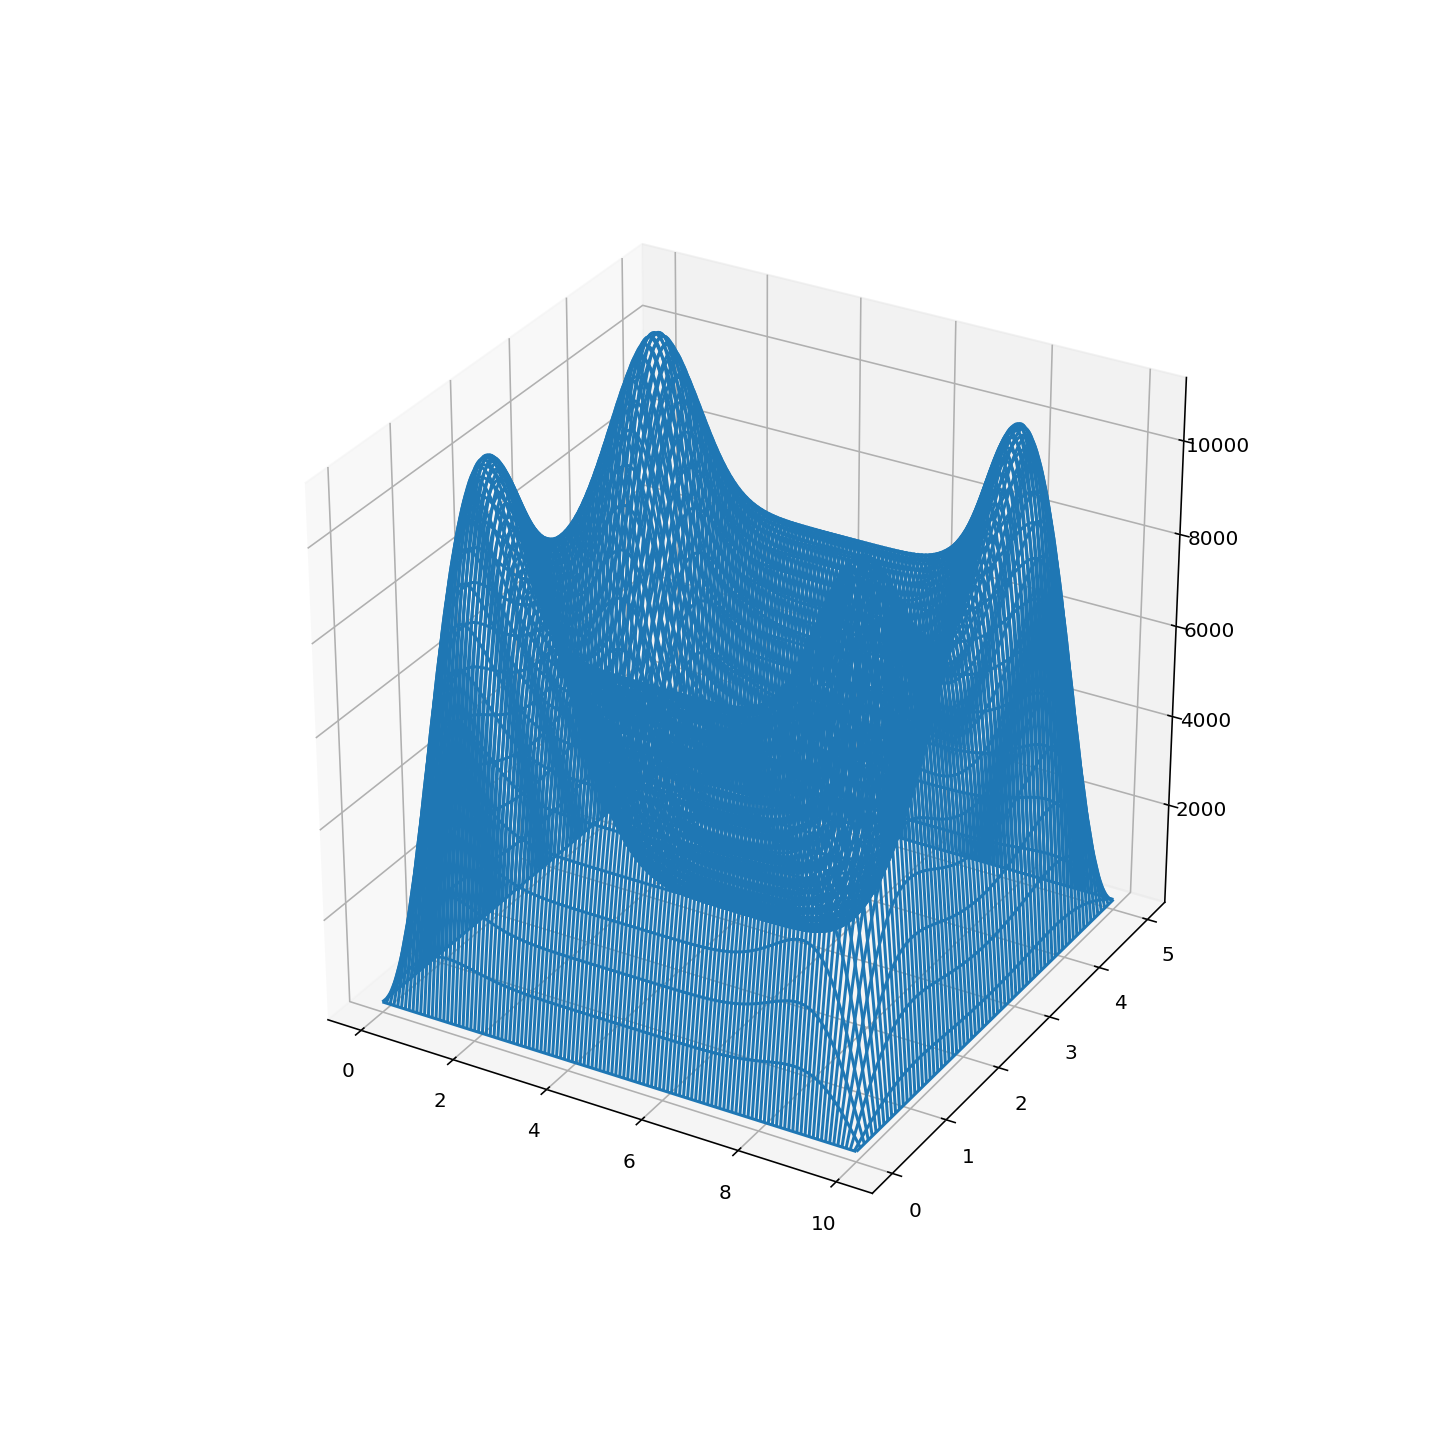

In [109]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X,Y,u_next, rstride=2, cstride=2)
plt.show()

In [98]:
plt.savefig('figure', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)